In [51]:
# Simple CNN model for CIFAR-10
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import max_norm
from keras.optimizers import SGD
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical
#from keras import backend as K
#K.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = tf.keras.optimizers.SGD(learning_rate = lrate, momentum = 0.9, decay = decay, nesterov = False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,210,090 (16.06 MB)

 Trainable params: 4,210,090 (16.06 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 55ms/step - accuracy: 0.3015 - loss: 1.9156 - val_accuracy: 0.4910 - val_loss: 1.3832
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.4937 - loss: 1.4037 - val_accuracy: 0.5757 - val_loss: 1.2042
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.5588 - loss: 1.2295 - val_accuracy: 0.6034 - val_loss: 1.1140
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.6117 - loss: 1.0852 - val_accuracy: 0.6091 - val_loss: 1.1092
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.6613 - loss: 0.9678 - val_accuracy: 0.6296 - val_loss: 1.0590
Accuracy: 62.96%


In [53]:
# Creating the updated model by following the instructions to report how the performance changed
updated_model = Sequential()
updated_model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
updated_model.add(Dropout(0.2))
updated_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
updated_model.add(MaxPooling2D(pool_size=(2, 2)))
updated_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
updated_model.add(Dropout(0.2))
updated_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
updated_model.add(MaxPooling2D(pool_size=(2, 2)))
updated_model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
updated_model.add(Dropout(0.2))
updated_model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
updated_model.add(MaxPooling2D(pool_size=(2, 2)))
updated_model.add(Flatten())
updated_model.add(Dropout(0.2))
updated_model.add(Dense(1024, activation='relu', kernel_constraint=max_norm(3)))
updated_model.add(Dropout(0.2))
updated_model.add(Dense(512, activation='relu', kernel_constraint=max_norm(3)))
updated_model.add(Dropout(0.2))
updated_model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(learning_rate = lrate, momentum = 0.9, decay = decay, nesterov = False)
updated_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(updated_model.summary())
# Fit the model
history = updated_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = updated_model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,915,114 (11.12 MB)

 Trainable params: 2,915,114 (11.12 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 174s 107ms/step - accuracy: 0.2334 - loss: 2.0410 - val_accuracy: 0.4559 - val_loss: 1.4766
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 192s 101ms/step - accuracy: 0.4643 - loss: 1.4748 - val_accuracy: 0.4890 - val_loss: 1.3841
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 165s 105ms/step - accuracy: 0.5588 - loss: 1.2357 - val_accuracy: 0.6101 - val_loss: 1.0884
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 165s 106ms/step - accuracy: 0.6191 - loss: 1.0753 - val_accuracy: 0.6538 - val_loss: 0.9919
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 166s 106ms/step - accuracy: 0.6671 - loss: 0.9428 - val_accuracy: 0.7015 - val_loss: 0.8621
Accuracy: 70.15%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


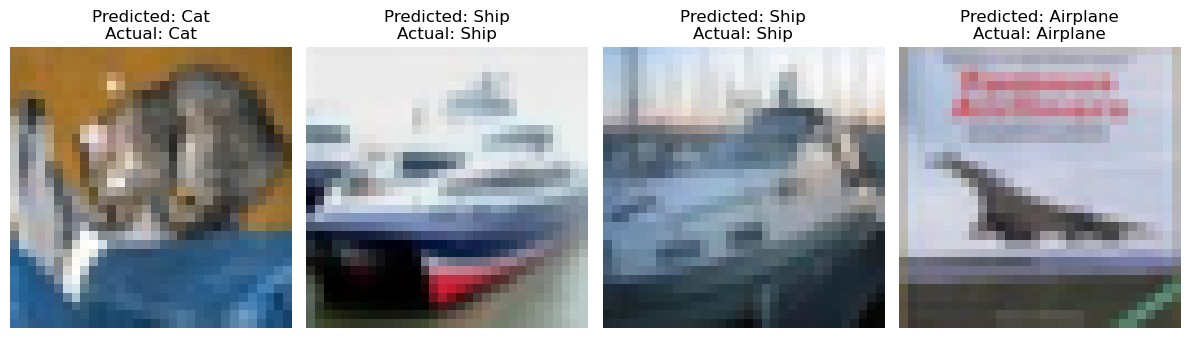

In [55]:
import matplotlib.pyplot as plt

# Class labels for CIFAR-10 dataset
class_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer','Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Predicting the first 4 images from the test set
predictions = updated_model.predict(X_test[:4])
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test[:4], axis=1)

# Display results
plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 4, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {class_labels[predicted_classes[i]]}\nActual: {class_labels[actual_classes[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

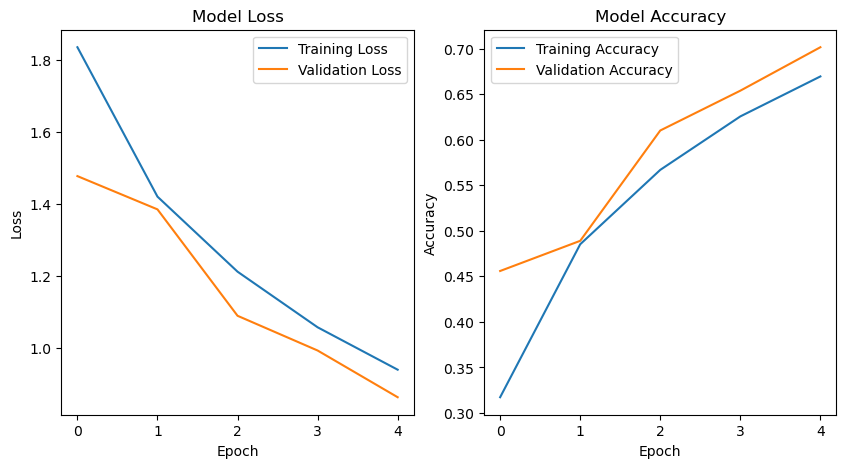

In [57]:
# Visualize Loss and Accuracy using the history object
# Plot for training data Loss and validation data Loss using the history object in the source code
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot for training data accuracy and validation data accuracy using the history object in the source code
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Video Link https://drive.google.com/file/d/1Av-nkW0X0pUnrudjVora76xJ8i46Jzju/view